# Give me Some Credit

## Project Objective: To build a Classification Model to Detect the Likelihood of Borrower Default

Data Source: https://www.kaggle.com/competitions/GiveMeSomeCredit/data

View and Download Project Checklist here: https://github.com/drjodyannjones/JN-credit-scoring-analysis/blob/main/Machine_Learning_Project_Checklist.pdf

Complete project repo can be cloned here: https://github.com/drjodyannjones/JN-credit-scoring-analysis

Data Dictionary:
    
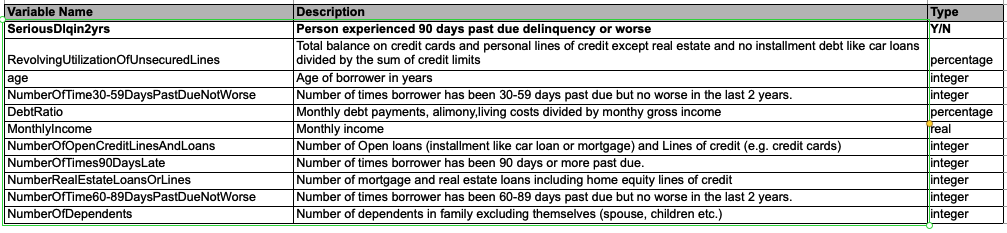

## Import Libraries

In [111]:
import numpy as np #numerical computation
import pandas as pd #data transformation
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization

# Feature Engineering
from sklearn.preprocessing import StandardScaler

# Model Training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Model Evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from xgboost import plot_importance


# Hyperparameter Fine-tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Save Model
import pickle
import joblib

# Style Formatting Charts and Graphs
plt.style.use('ggplot')

## Load Data

In [2]:
df = pd.read_csv('credit-score-data.csv')
df.head(5)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Unnamed: 12
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,NaN
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,NaN
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,NaN
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,NaN
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,NaN


In [3]:
df.drop(['Unnamed: 0','Unnamed: 12'], axis=1, inplace=True)
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## Inspect data

In [4]:
print("The original shape of the data is: ", df.shape)
print('---' * 10)
print(df.info())

The original shape of the data is:  (150000, 11)
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  i

['NumberOfDependents'] = df['NumberOfDependents'].astype(int)
df['NumberOfDependents'].dtype## Handling Missing Data

In [5]:
df.isna().sum()/len(df)*100

SeriousDlqin2yrs                         0.000000
RevolvingUtilizationOfUnsecuredLines     0.000000
age                                      0.000000
NumberOfTime30-59DaysPastDueNotWorse     0.000000
DebtRatio                                0.000000
MonthlyIncome                           19.820667
NumberOfOpenCreditLinesAndLoans          0.000000
NumberOfTimes90DaysLate                  0.000000
NumberRealEstateLoansOrLines             0.000000
NumberOfTime60-89DaysPastDueNotWorse     0.000000
NumberOfDependents                       2.616000
dtype: float64

In [6]:
df.dropna(subset=['NumberOfDependents'], inplace=True)
df.isna().sum()/len(df)*100

SeriousDlqin2yrs                         0.000000
RevolvingUtilizationOfUnsecuredLines     0.000000
age                                      0.000000
NumberOfTime30-59DaysPastDueNotWorse     0.000000
DebtRatio                                0.000000
MonthlyIncome                           17.666831
NumberOfOpenCreditLinesAndLoans          0.000000
NumberOfTimes90DaysLate                  0.000000
NumberRealEstateLoansOrLines             0.000000
NumberOfTime60-89DaysPastDueNotWorse     0.000000
NumberOfDependents                       0.000000
dtype: float64

# Fix Erroneous Data Types
NumberOfDependents should be of int type and not float.

In [7]:
df['NumberOfDependents'] = df['NumberOfDependents'].astype(int)
df['NumberOfDependents'].dtype

dtype('int64')

## Impute Missing Values from Monthly Income

In [8]:
df.fillna(df.median(numeric_only=True).round(1), inplace=True)
df.isna().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

## Check for Duplicate  Records

In [9]:
df.duplicated().sum()/len(df)*100

0.3511870533147129

## Drop Duplicate Records

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()/len(df)*100

0.0

In [12]:
# Assess our data after taking care of missing and duplicate values
df.sample(20)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
63150,0,0.001231,68,0,0.121277,9300.0,9,0,1,0,0
117768,0,0.223124,74,0,777.000000,5400.0,8,0,0,0,0
8899,0,0.632322,46,1,0.481113,1508.0,6,0,0,0,0
88369,0,0.038385,72,0,2482.000000,5400.0,4,0,1,0,0
73726,0,0.024989,53,0,0.302809,2740.0,8,0,1,0,0
28179,0,0.536696,63,0,0.400761,6831.0,8,0,2,0,0
124403,0,0.261925,33,0,0.548387,2603.0,9,0,1,1,1
104717,0,0.204060,36,0,0.138191,7040.0,4,0,0,0,0
24574,0,0.573920,42,0,0.469156,4927.0,7,0,1,0,3
80367,0,1.000000,53,0,0.187660,8200.0,1,0,1,0,1


In [13]:
print("The shape of the data after preliminary preprocessing is: ", df.shape)

The shape of the data after preliminary preprocessing is:  (145563, 11)


## Exploratory Data Analysis

### Descriptive Summary Statistics

In [14]:
# Get Summary Descriptive Statistics
df.describe().T.round(2).style.format('{0:,.1f}')

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,"145,563.0",0.1,0.2,0.0,0.0,0.0,0.0,1.0
RevolvingUtilizationOfUnsecuredLines,"145,563.0",5.9,250.5,0.0,0.0,0.2,0.6,"50,708.0"
age,"145,563.0",52.1,14.6,0.0,41.0,52.0,62.0,107.0
NumberOfTime30-59DaysPastDueNotWorse,"145,563.0",0.4,3.8,0.0,0.0,0.0,0.0,98.0
DebtRatio,"145,563.0",334.6,"1,947.2",0.0,0.2,0.4,0.8,"329,664.0"
MonthlyIncome,"145,563.0","6,452.7","13,083.3",0.0,"3,816.0","5,400.0","7,500.0","3,008,750.0"
NumberOfOpenCreditLinesAndLoans,"145,563.0",8.6,5.1,0.0,5.0,8.0,11.0,58.0
NumberOfTimes90DaysLate,"145,563.0",0.2,3.7,0.0,0.0,0.0,0.0,98.0
NumberRealEstateLoansOrLines,"145,563.0",1.0,1.1,0.0,0.0,1.0,2.0,54.0
NumberOfTime60-89DaysPastDueNotWorse,"145,563.0",0.2,3.7,0.0,0.0,0.0,0.0,98.0


### Aggregations

In [15]:
# df.groupby('age')['SeriousDlqin2yrs'].median()

In [16]:
# Check number of unique values for each variable
df.nunique()

SeriousDlqin2yrs                             2
RevolvingUtilizationOfUnsecuredLines    122957
age                                         84
NumberOfTime30-59DaysPastDueNotWorse        16
DebtRatio                               114090
MonthlyIncome                            13594
NumberOfOpenCreditLinesAndLoans             58
NumberOfTimes90DaysLate                     19
NumberRealEstateLoansOrLines                28
NumberOfTime60-89DaysPastDueNotWorse        13
NumberOfDependents                          13
dtype: int64

## Separate continuous from disrete variables

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145563 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      145563 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  145563 non-null  float64
 2   age                                   145563 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  145563 non-null  int64  
 4   DebtRatio                             145563 non-null  float64
 5   MonthlyIncome                         145563 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       145563 non-null  int64  
 7   NumberOfTimes90DaysLate               145563 non-null  int64  
 8   NumberRealEstateLoansOrLines          145563 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  145563 non-null  int64  
 10  NumberOfDependents                    145563 non-null  int64  
dtype

In [18]:
discrete = [col for col in df.columns if df[col].dtype == 'int']
continuous = [col for col in df.columns if df[col].dtype != 'int']

In [19]:
df[continuous]

,RevolvingUtilizationOfUnsecuredLines,DebtRatio,MonthlyIncome
0,0.766127,0.802982,9120.0
1,0.957151,0.121876,2600.0
2,0.658180,0.085113,3042.0
3,0.233810,0.036050,3300.0
4,0.907239,0.024926,63588.0
...,...,...,...
149995,0.040674,0.225131,2100.0
149996,0.299745,0.716562,5584.0
149997,0.246044,3870.000000,5400.0
149998,0.000000,0.000000,5716.0


### Check Distribution of Data
#### Plot Histograms

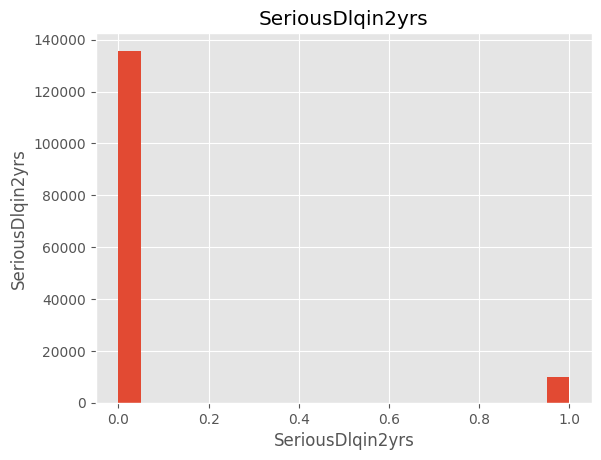

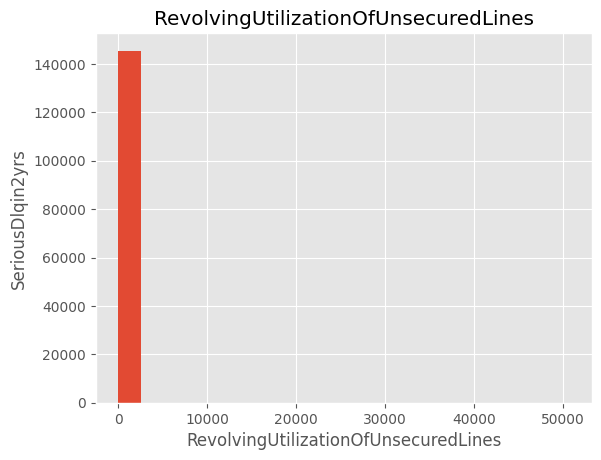

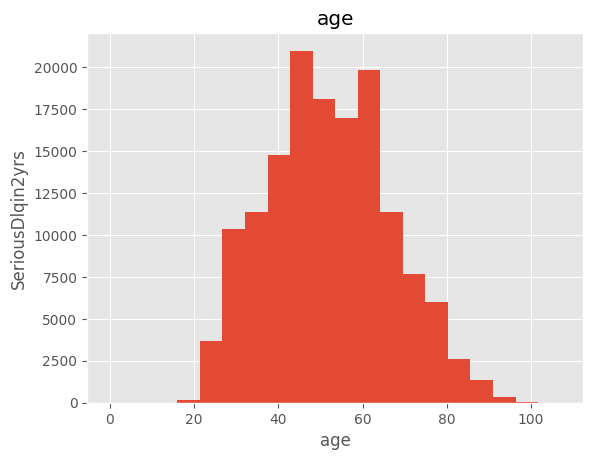

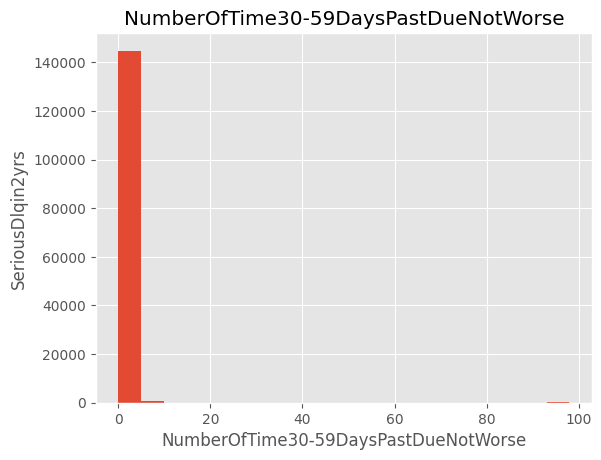

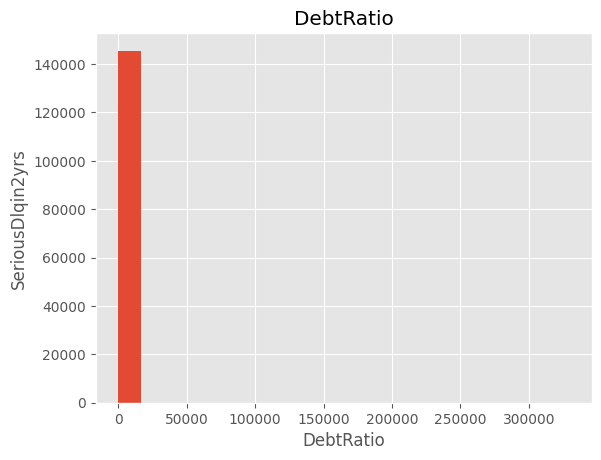

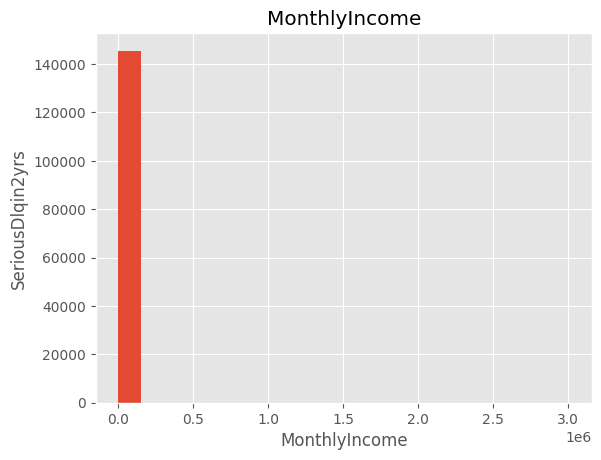

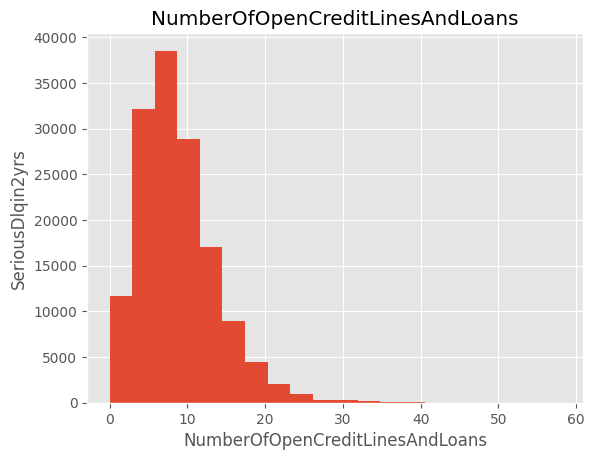

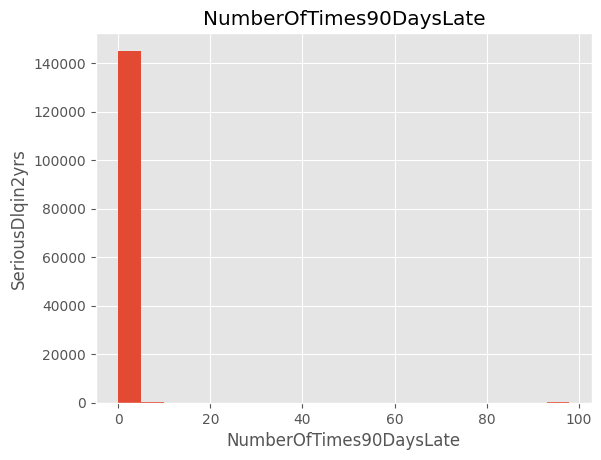

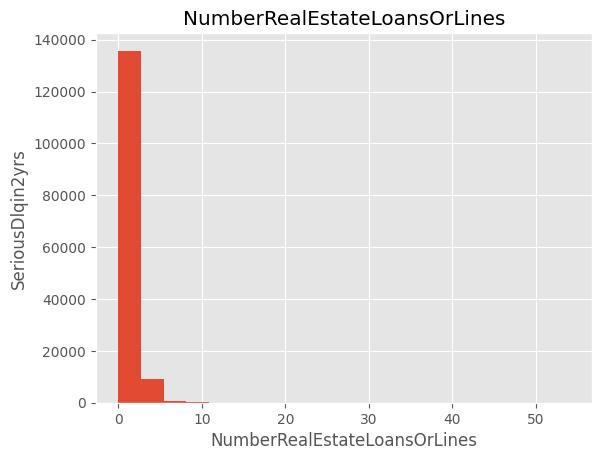

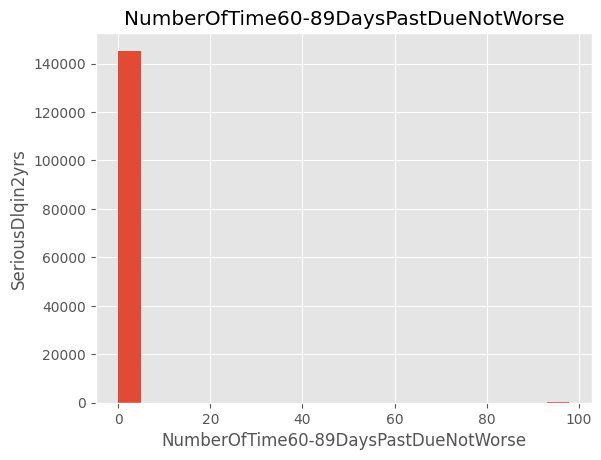

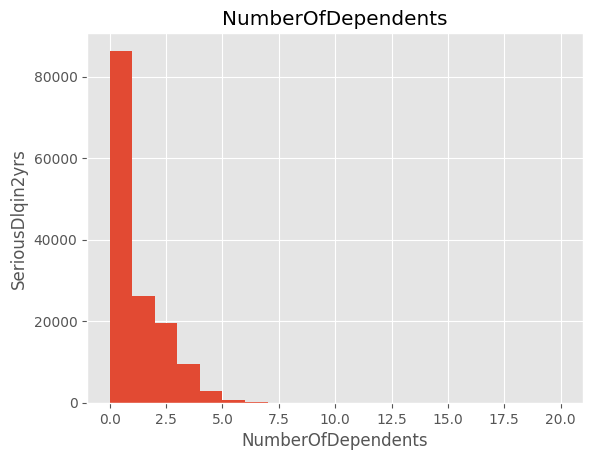

<Figure size 640x480 with 0 Axes>

In [20]:
# Create function that plots histograms for each variable
def histogram_plot(df, var):
    """
    This function creates histogram plots for numerical features.
    """
    df = df.copy()
    df[var].hist(bins=20)
    plt.ylabel('SeriousDlqin2yrs')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for var in df:
    histogram_plot(df, var)
    plt.savefig('give_me_some_credit_{0}.png'.format(var))

### Check Relationship between Features and Target
#### Plot Scatterplots

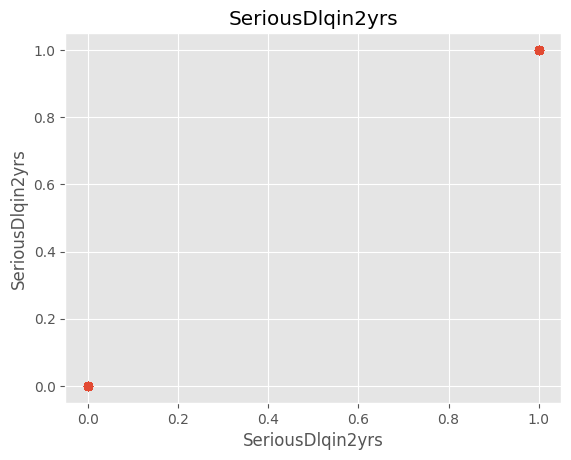

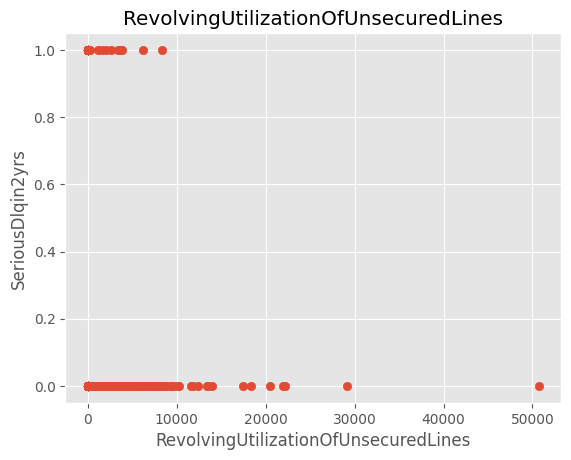

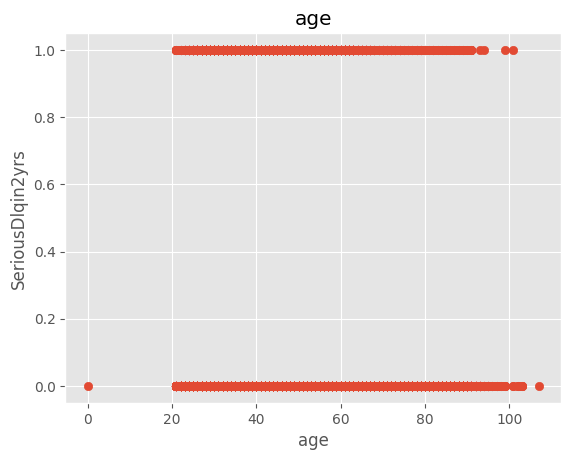

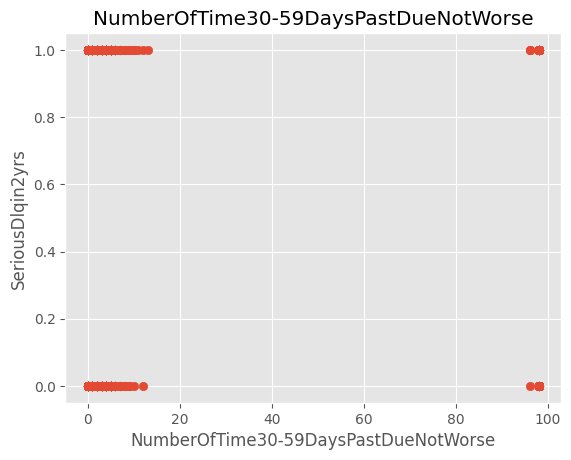

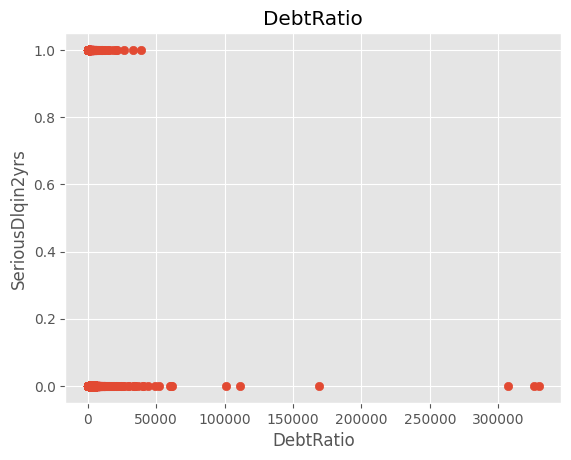

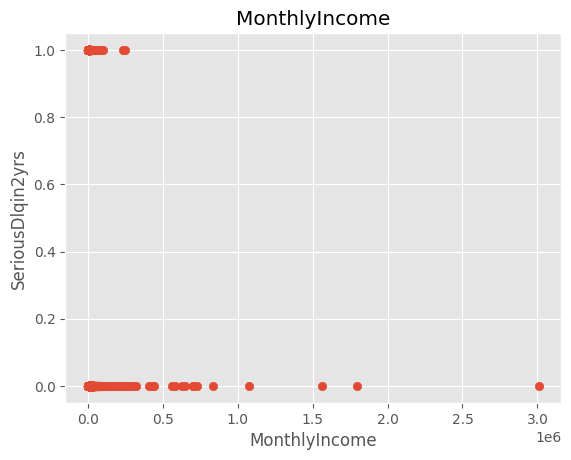

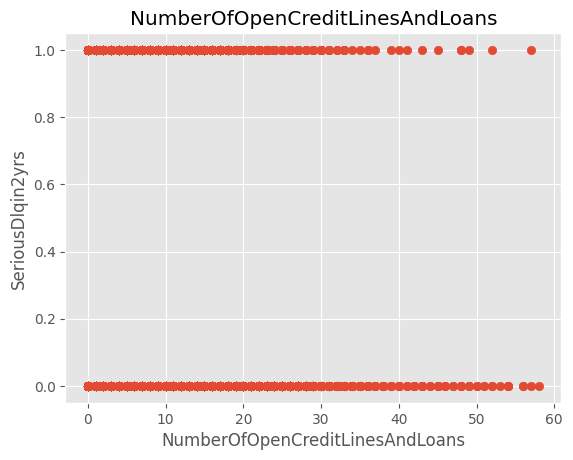

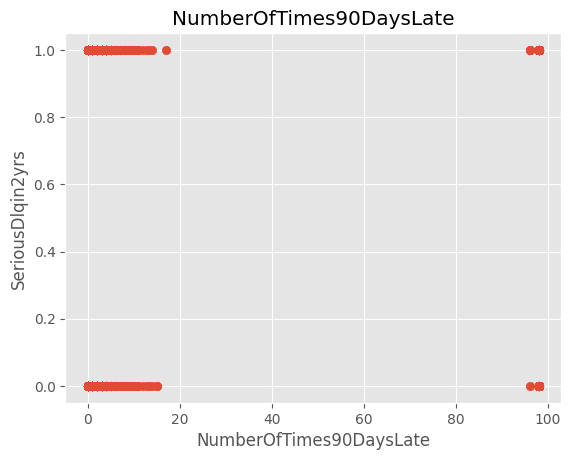

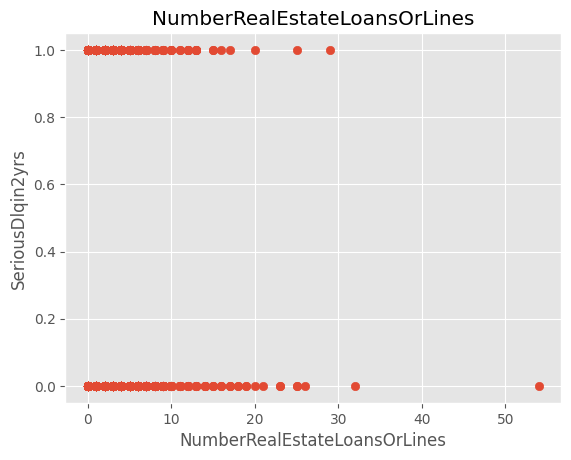

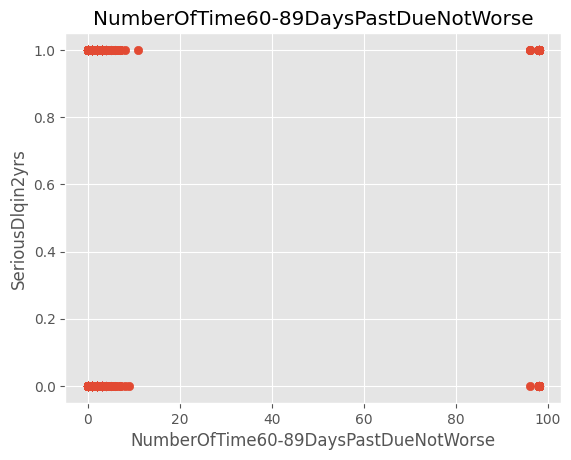

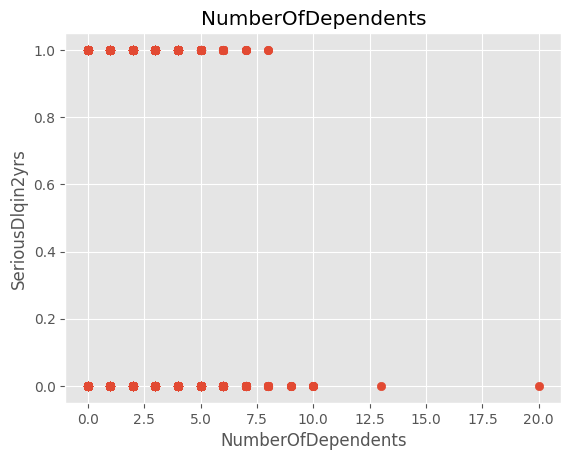

In [21]:
# Create function that plots bivariate relationship betweeen each predictor variable and target.

def scatterplot(df, var):
    """
    This function illustrates bivariate relationships using scatterplot
    """
    df = df.copy()
    plt.scatter(df[var], df['SeriousDlqin2yrs'])
    plt.ylabel('SeriousDlqin2yrs')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for var in df:
    scatterplot(df, var)

As we can see, because our target variable is binary (that is takes a value of either 0 or 1), a scatterplot is not a really helpful illustration of the bivariate relationships.

### Check Correlation among Features and Target
#### Plot Heatmap

<AxesSubplot:>

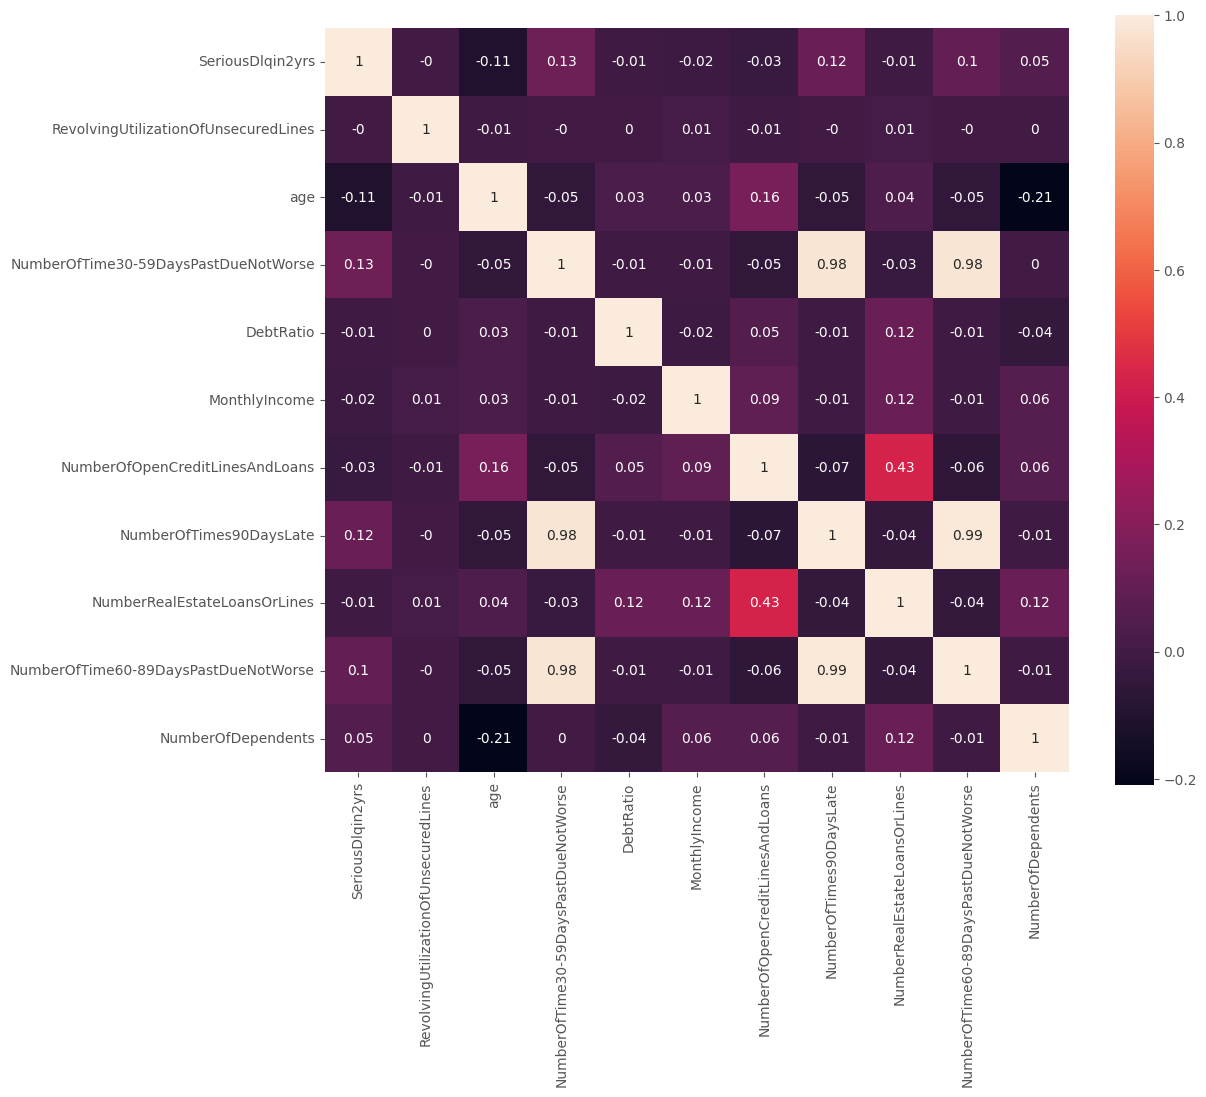

In [22]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr().round(2), annot=True, square=True)

### Check for Outliers
#### Plot Violinpots

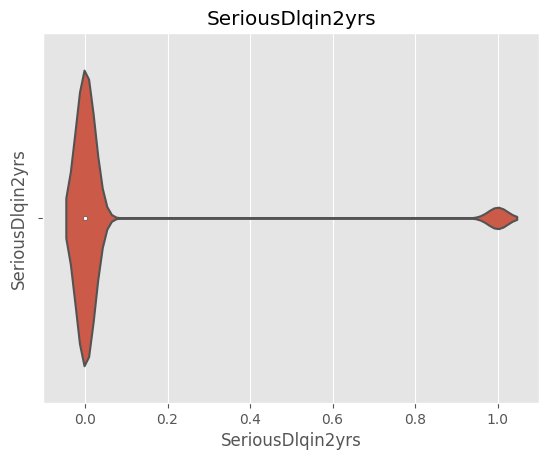

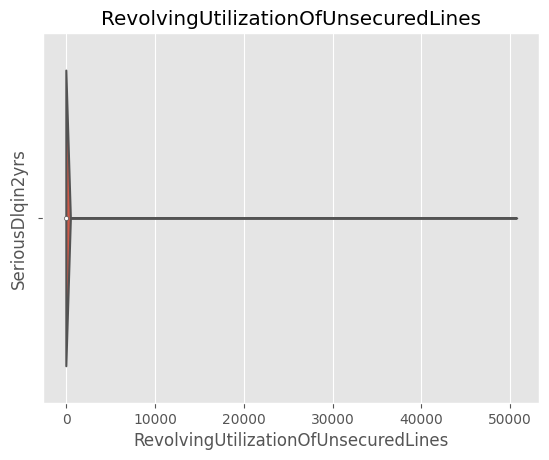

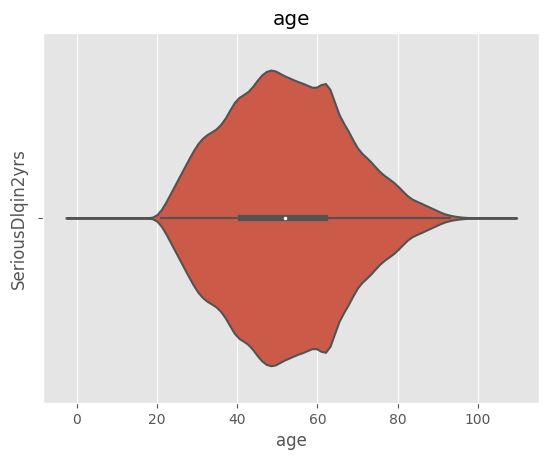

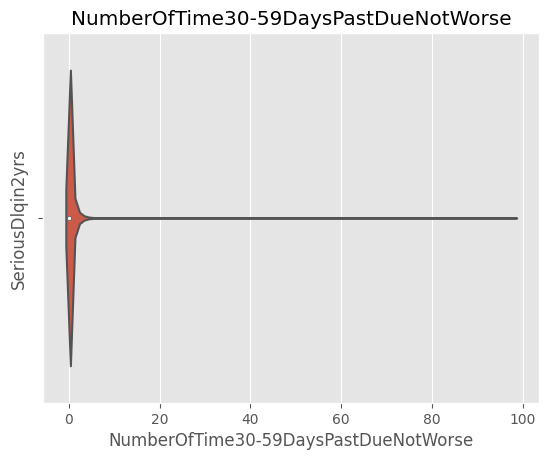

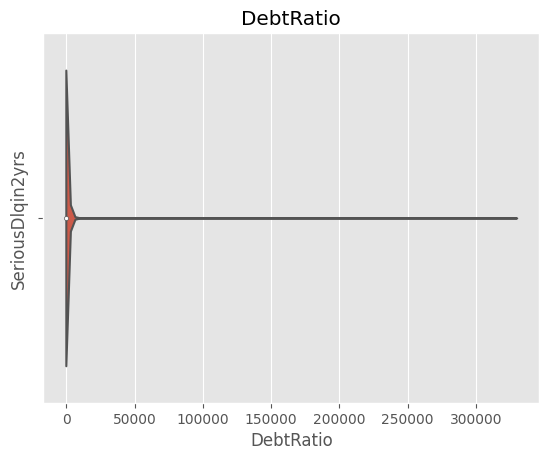

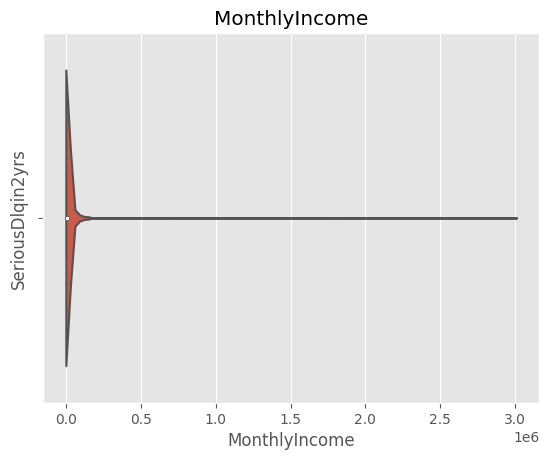

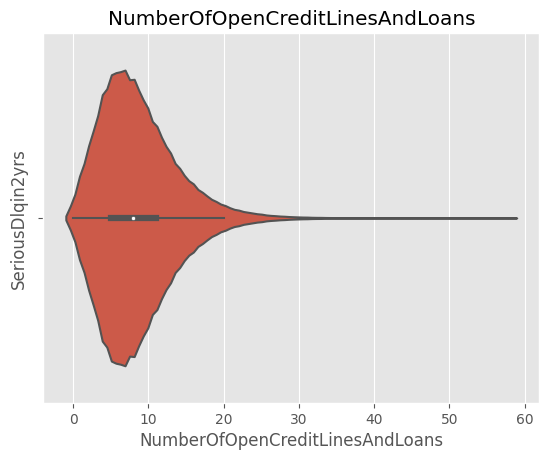

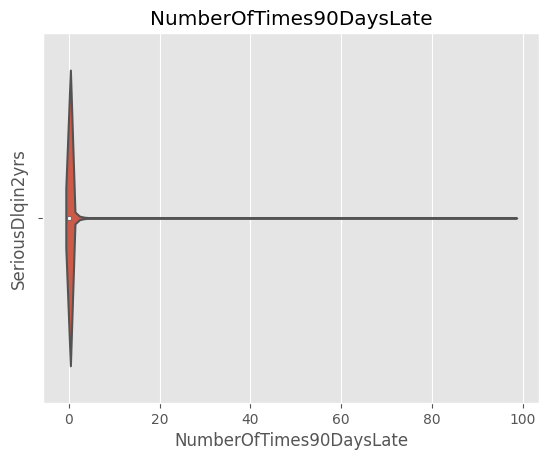

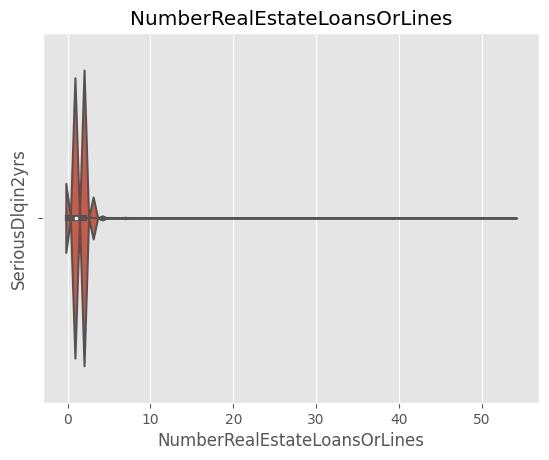

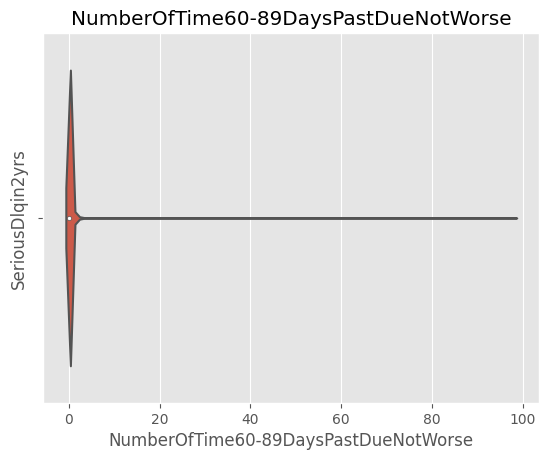

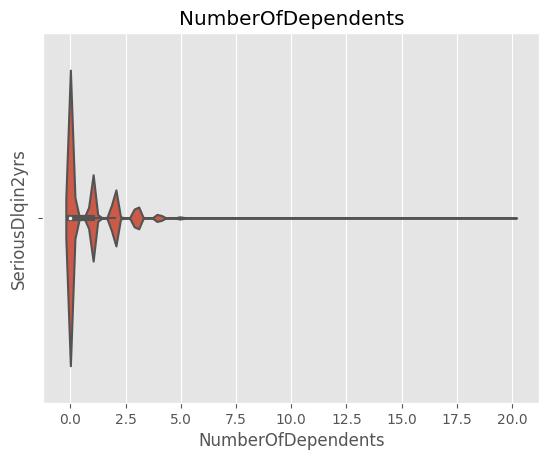

In [23]:
# Create function that identifies outliers in variables
def violin_plot(df, var):
    """
    This function illustrates bivariate relationships using scatterplot
    """
    df = df.copy()
    sns.violinplot(x = df[var])
    plt.ylabel('SeriousDlqin2yrs')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for var in df:
    violin_plot(df, var)

# Feature Engineering

## Normalize numerical features

In [24]:
# Instantiate an object from StandardScaler class
sc = StandardScaler()

In [25]:
# Create function that normalizes numerical features

def scale_columns(df, columns):
    scaler = StandardScaler()
    for col in columns:
        if col in df.columns:
            df[col] = scaler.fit_transform(df[[col]])
        else:
            print(f"Column {col} not found in DataFrame.")
    return df

In [26]:
df.dtypes

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                        int64
dtype: object

In [27]:
scaled_df = scale_columns(df, 
                          ['RevolvingUtilizationOfUnsecuredLines',
                           'age',
                           'DebtRatio', 
                           'MonthlyIncome'])

In [28]:
scaled_df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,-0.020659,-0.488117,2,-0.171396,0.203874,13,0,6,0,2
1,0,-0.019896,-0.831345,0,-0.171745,-0.294472,4,0,0,0,1
2,0,-0.021090,-0.968636,1,-0.171764,-0.260689,2,1,0,0,0
3,0,-0.022784,-1.517800,0,-0.171789,-0.240969,5,0,0,0,0
4,0,-0.020096,-0.213536,1,-0.171795,4.367055,7,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,-0.023555,1.502601,0,-0.171692,-0.332689,4,0,1,0,0
149996,0,-0.022521,-0.556763,0,-0.171440,-0.066395,4,0,1,0,2
149997,0,-0.022735,0.404274,0,1.815639,-0.080459,18,0,1,0,0
149998,0,-0.023717,-1.517800,0,-0.171808,-0.056306,4,0,0,0,0


# Model Training Prep

In [49]:
# Split data into X and y variables

X = scaled_df.loc[:, df.columns != 'SeriousDlqin2yrs']
y = scaled_df['SeriousDlqin2yrs']

In [50]:
# Split data into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=101
)

In [51]:
X_train.shape, X_test.shape

((116450, 10), (29113, 10))

In [52]:
y_train.shape, y_test.shape

((116450,), (29113,))

In [55]:
scaled_df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,-0.020659,-0.488117,2,-0.171396,0.203874,13,0,6,0,2
1,0,-0.019896,-0.831345,0,-0.171745,-0.294472,4,0,0,0,1
2,0,-0.021090,-0.968636,1,-0.171764,-0.260689,2,1,0,0,0
3,0,-0.022784,-1.517800,0,-0.171789,-0.240969,5,0,0,0,0
4,0,-0.020096,-0.213536,1,-0.171795,4.367055,7,0,1,0,0


# Model Selection and Training

## Baseline model: Logistic Regression

In [56]:
# Instantiate an object of the LogisticRegression class
lr = LogisticRegression()

In [57]:
# Fit Model
lr.fit(X_train, y_train)

LogisticRegression()

In [58]:
# Score Model
lr.score(X_train, y_train).round(2)

0.93

In [59]:
# Generate Predictions
y_pred = lr.predict(X_test)

### Logistic Regression Model Evaluation

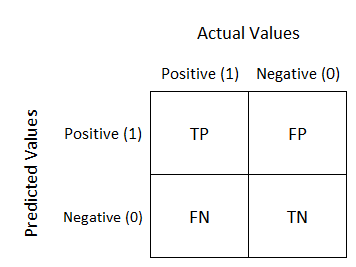

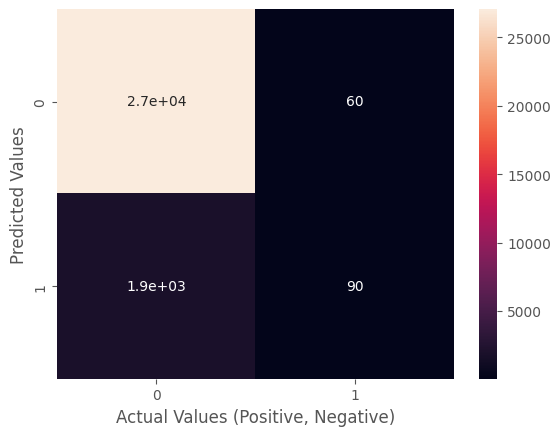

In [108]:
# Plot confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel("Actual Values (Positive, Negative)")
plt.ylabel("Predicted Values")
plt.show()

In [61]:
# Plot classification report
classification_report = metrics.classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.93      1.00      0.97     27128
           1       0.60      0.05      0.08      1985

    accuracy                           0.93     29113
   macro avg       0.77      0.52      0.52     29113
weighted avg       0.91      0.93      0.91     29113



In [67]:
# Predict Class Probabilities
probabilities = lr.predict_proba(X_test)
probabilities

array([[0.93250113, 0.06749887],
       [0.93101212, 0.06898788],
       [0.93442694, 0.06557306],
       ...,
       [0.97893587, 0.02106413],
       [0.96857991, 0.03142009],
       [0.94601047, 0.05398953]])

In [78]:
# Compare first 20 rows of predicted class with predicted probabilities
list(zip(y_pred, probabilities))[:20]

[(0, array([0.93250113, 0.06749887])),
 (0, array([0.93101212, 0.06898788])),
 (0, array([0.93442694, 0.06557306])),
 (0, array([0.91114683, 0.08885317])),
 (0, array([0.94980292, 0.05019708])),
 (0, array([0.90755285, 0.09244715])),
 (0, array([0.96289121, 0.03710879])),
 (0, array([0.91014408, 0.08985592])),
 (0, array([0.96650064, 0.03349936])),
 (0, array([0.93892753, 0.06107247])),
 (0, array([0.97077111, 0.02922889])),
 (0, array([0.98315388, 0.01684612])),
 (0, array([0.86902258, 0.13097742])),
 (0, array([0.9138074, 0.0861926])),
 (1, array([0.13037682, 0.86962318])),
 (0, array([0.90687586, 0.09312414])),
 (0, array([0.879308, 0.120692])),
 (0, array([0.88654623, 0.11345377])),
 (0, array([0.9078579, 0.0921421])),
 (0, array([0.93821901, 0.06178099]))]

In [64]:
preds = probabilities[:, 1]

In [65]:
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

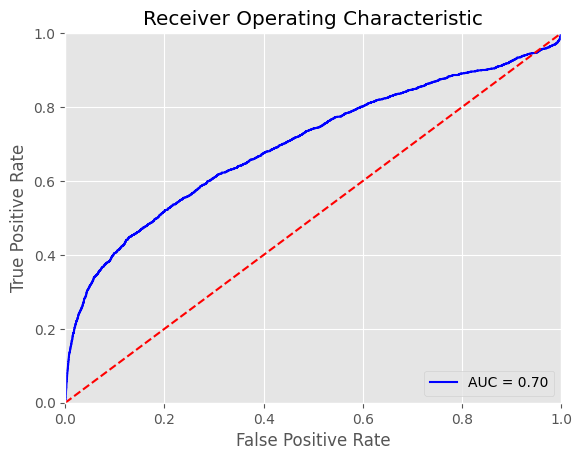

In [66]:
# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Model #2: Random Forest Classification

In [93]:
# Instantiate
rf = RandomForestClassifier()

# Fit Model
rf.fit(X_train, y_train)

# Score Model
rf.score(X_train, y_train).round(2)

# Generate Predictions
y_pred_rf = rf.predict(X_test)

### Random Forest Classification Model Evaluation

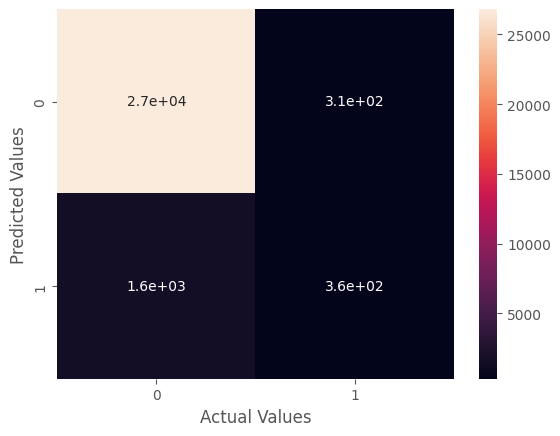

In [94]:
# Plot confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_rf)
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [96]:
# Plot classification report
classification_report = metrics.classification_report(y_test, y_pred_rf)
print(classification_report)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     27128
           1       0.54      0.18      0.27      1985

    accuracy                           0.93     29113
   macro avg       0.74      0.59      0.62     29113
weighted avg       0.92      0.93      0.92     29113



In [97]:
# Predict Class Probabilities
probabilities_rf = rf.predict_proba(X_test)
probabilities_rf

array([[0.93      , 0.07      ],
       [0.97      , 0.03      ],
       [0.81      , 0.19      ],
       ...,
       [0.97973742, 0.02026258],
       [0.99      , 0.01      ],
       [0.98      , 0.02      ]])

In [98]:
# Compare first 20 rows of predicted class with predicted probabilities
list(zip(y_pred, probabilities_rf))[:20]

[(0, array([0.93, 0.07])),
 (0, array([0.97, 0.03])),
 (0, array([0.81, 0.19])),
 (0, array([0.99, 0.01])),
 (0, array([0.99, 0.01])),
 (0, array([0.48, 0.52])),
 (0, array([0.96973742, 0.03026258])),
 (0, array([0.94, 0.06])),
 (0, array([9.99737424e-01, 2.62576183e-04])),
 (0, array([0.93973742, 0.06026258])),
 (0, array([0.97973742, 0.02026258])),
 (0, array([0.81973742, 0.18026258])),
 (0, array([0.91, 0.09])),
 (0, array([0.86973742, 0.13026258])),
 (1, array([0.26, 0.74])),
 (0, array([9.99737424e-01, 2.62576183e-04])),
 (0, array([0.87, 0.13])),
 (0, array([0.87, 0.13])),
 (0, array([0.94, 0.06])),
 (0, array([0.93946899, 0.06053101]))]

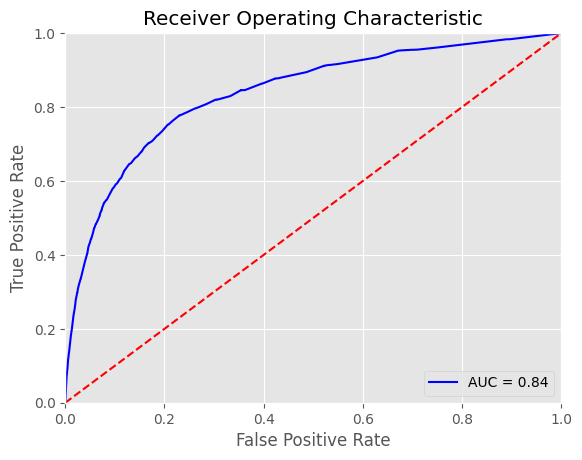

In [99]:
# Calculate True Positive Rate and False Positive Rate

preds_rf = probabilities_rf[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds_rf)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Model #3: XGBoost Classification

In [102]:
# Instantiate
xgb = XGBClassifier()

# Fit Model
xgb.fit(X_train, y_train)

# Score Model
xgb.score(X_train, y_train).round(2)

# Generate Predictions
y_pred_xgb = xgb.predict(X_test)

### XGBoost Classification Model Evaluation

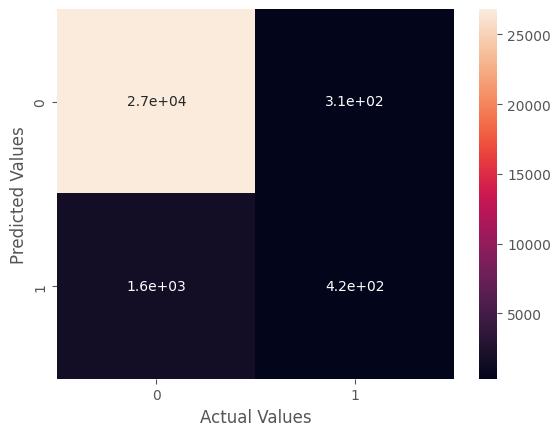

In [103]:
# Plot confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [104]:
# Plot classification report
classification_report = metrics.classification_report(y_test, y_pred_xgb)
print(classification_report)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     27128
           1       0.57      0.21      0.31      1985

    accuracy                           0.94     29113
   macro avg       0.76      0.60      0.64     29113
weighted avg       0.92      0.94      0.92     29113



In [105]:
# Predict Class Probabilities
probabilities_xgb = xgb.predict_proba(X_test)
probabilities_xgb

array([[0.884488  , 0.115512  ],
       [0.9737193 , 0.0262807 ],
       [0.866592  , 0.133408  ],
       ...,
       [0.99658835, 0.00341165],
       [0.98577785, 0.01422213],
       [0.9937598 , 0.00624019]], dtype=float32)

In [106]:
# Compare first 20 rows of predicted class with predicted probabilities
list(zip(y_pred, probabilities_xgb))[:20]

[(0, array([0.884488, 0.115512], dtype=float32)),
 (0, array([0.9737193, 0.0262807], dtype=float32)),
 (0, array([0.866592, 0.133408], dtype=float32)),
 (0, array([0.97087824, 0.02912175], dtype=float32)),
 (0, array([0.979301  , 0.02069903], dtype=float32)),
 (0, array([0.46714503, 0.532855  ], dtype=float32)),
 (0, array([0.9853707 , 0.01462928], dtype=float32)),
 (0, array([0.9224689 , 0.07753111], dtype=float32)),
 (0, array([0.99646324, 0.00353679], dtype=float32)),
 (0, array([0.9941848 , 0.00581522], dtype=float32)),
 (0, array([0.9945661 , 0.00543393], dtype=float32)),
 (0, array([0.95628345, 0.04371658], dtype=float32)),
 (0, array([0.9188185 , 0.08118151], dtype=float32)),
 (0, array([0.91630155, 0.08369847], dtype=float32)),
 (1, array([0.29985994, 0.70014006], dtype=float32)),
 (0, array([0.9761141 , 0.02388589], dtype=float32)),
 (0, array([0.8632765 , 0.13672355], dtype=float32)),
 (0, array([0.88293606, 0.11706392], dtype=float32)),
 (0, array([0.8814007 , 0.11859933], d

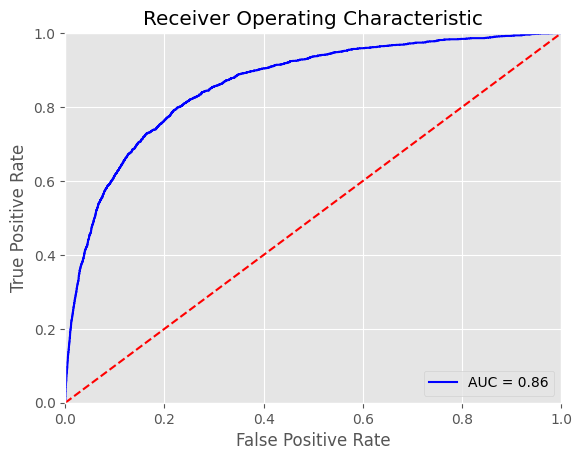

In [109]:
# Calculate True Positive Rate and False Positive Rate

preds_xgb = probabilities_xgb[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds_xgb)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

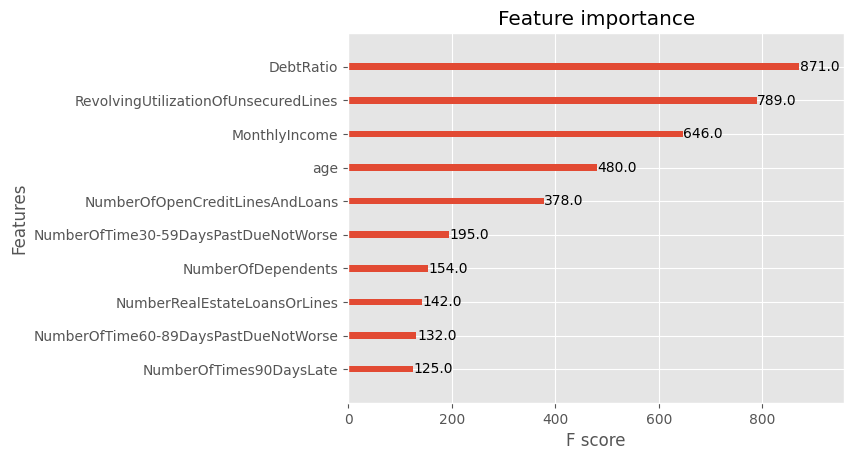

In [115]:
plot_importance(xgb)
plt.show()